In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2

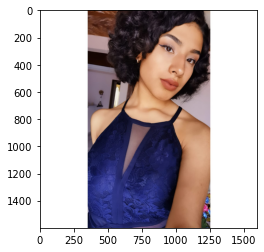

In [2]:
img = cv2.imread('Blue1.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convertir color [viene en cv]
plt.figure()
plt.imshow(img)
plt.show()

In [3]:
img.shape

(1600, 1600, 3)

(1600, 1600)
[  0 255]


<ipython-input-4-cab334d43aa3>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,4,4)


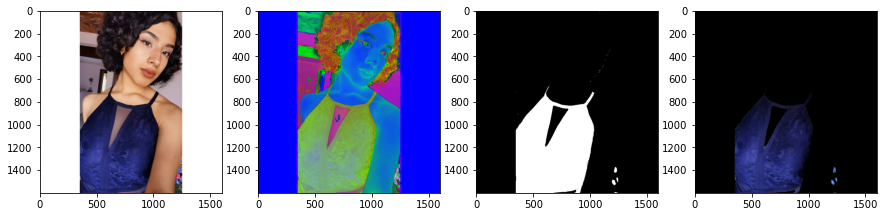

In [4]:
## nrows, ncols, nch = img.shape #nch = canales (RGB)
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
#RBG <-> HSV: https://www.peko-step.com/es/tool/hsvrgb.html
lower = np.array([90,50,0]) #Hue, saturation, value [https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/HSV_color_solid_cylinder.png/1200px-HSV_color_solid_cylinder.png]
upper = np.array([130,255,255]) 
mask_range = cv2.inRange(hsv,lower,upper) #detectamos máscara (los que sí son azules los pone de blanco (sí cumplen))
img_mask = cv2.bitwise_and(img, img, mask=mask_range)


print(mask_range.shape)
print(np.unique(mask_range))

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(img)
plt.subplot(1,4,2)
plt.imshow(hsv) #espera rgb y recibe hsv, por eso se ve raro
plt.subplot(1,4,3)
plt.imshow(mask_range, cmap='gray') #mapa establecido en escala de grises
plt.subplot(1,4,4)
plt.subplot(1,4,4)

#playera verde
plt.imshow(img_mask) #muestra los que cumplen en mask_range a color
plt.show()


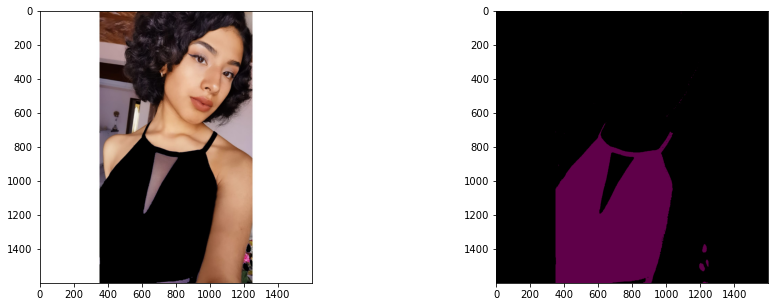

In [5]:

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)########

#background
background = cv2.bitwise_and(img,img, mask= ~mask_range)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(background)


#Change color
shirtNew = np.zeros_like(img_mask)
shirtNew[:,:,0] = 95
shirtNew[:,:,1] = 0
shirtNew[:,:,2] = 73
# print("img: ", img.shape)
# print("shirtNew: ", shirtNew.shape)
newcolorMask = cv2.bitwise_and(shirtNew,shirtNew, mask= mask_range)
plt.subplot(1,2,2)
plt.imshow(newcolorMask)
plt.show()

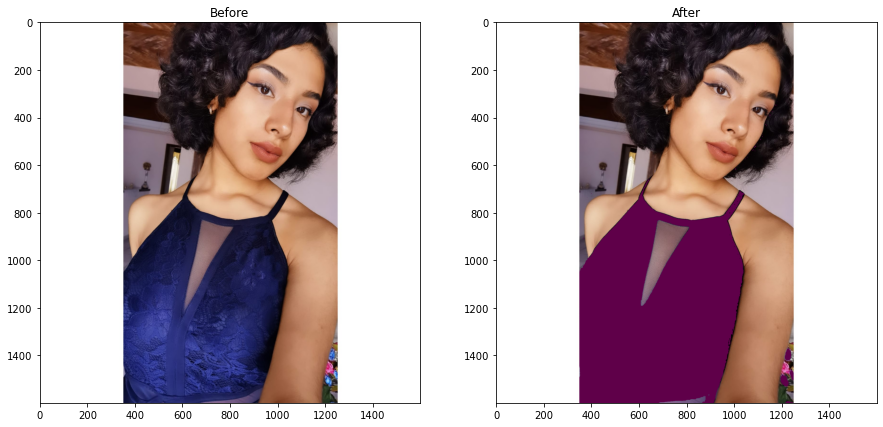

In [6]:
#sumar imagenes
result = background + newcolorMask
plt.figure(figsize=(15,20))
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('After')
plt.imshow(result)
plt.show()